In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/diabetes_clean.csv'

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import *
from keras.layers import *
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

In [4]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train.drop(columns = 'Unnamed: 0', inplace=True)
train

,GenHlth,NoDocCost,KidneyDisease,Married,HasInsurance,PhysHlthBad,MentHelthBad,Exercise,HighBP,HighChol,...,FrenchFryIntake,PotatoIntake,OtherVegIntake,Race_White,Race_Black,Race_Asian,Race_Native,Race_Hisp,Race_Other,DiabetesStatus
0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,13.000000,0.000000,300.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.000000,0.000000,14.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,...,43.000000,13.000000,100.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.000000,2.000000,100.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240118,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,11.902774,61.829034,100.000000,1.0,0.0,0.0,0.0,0.0,0.0,4.0
240119,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,42.697632,0.095873,56.793505,1.0,0.0,0.0,0.0,0.0,0.0,4.0
240120,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,27.718068,14.726470,67.000000,1.0,0.0,0.0,0.0,0.0,0.0,4.0
240121,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,7.990298,38.897338,51.063854,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')
test.drop(columns = 'Unnamed: 0', inplace=True)
test

,GenHlth,NoDocCost,KidneyDisease,Married,HasInsurance,PhysHlthBad,MentHelthBad,Exercise,HighBP,HighChol,...,FrenchFryIntake,PotatoIntake,OtherVegIntake,Race_White,Race_Black,Race_Asian,Race_Native,Race_Hisp,Race_Other,DiabetesStatus
0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,29.0,14.0,100.0,1,0,0,0,0,0,3.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,29.0,29.0,57.0,1,0,0,0,0,0,3.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,29.0,29.0,71.0,1,0,0,0,0,0,3.0
3,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,40.0,23.0,200.0,1,0,0,0,0,0,3.0
4,4.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,...,7.0,10.0,67.0,1,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27930,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,71.0,0,0,0,0,0,1,3.0
27931,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,100.0,1,0,0,0,0,0,3.0
27932,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,14.0,14.0,57.0,1,0,0,0,0,0,1.0
27933,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,7.0,43.0,100.0,1,0,0,0,0,0,3.0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27935 entries, 0 to 27934
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GenHlth           27935 non-null  float64
 1   NoDocCost         27935 non-null  float64
 2   KidneyDisease     27935 non-null  float64
 3   Married           27935 non-null  float64
 4   HasInsurance      27935 non-null  float64
 5   PhysHlthBad       27935 non-null  float64
 6   MentHelthBad      27935 non-null  float64
 7   Exercise          27935 non-null  float64
 8   HighBP            27935 non-null  float64
 9   HighChol          27935 non-null  float64
 10  HeartDisease      27935 non-null  float64
 11  Sex               27935 non-null  float64
 12  Height            27935 non-null  float64
 13  Weight            27935 non-null  float64
 14  EducationLvl      27935 non-null  float64
 15  IncomeLvl         27935 non-null  float64
 16  SmokerLvl         27935 non-null  float6

## Architecture 1: MLP

In [ ]:
x_train, y_train, x_test, y_test = train.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, :-1], test.iloc[:, -1] 

In [ ]:
# Architecture 1 : MLP
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier().fit(x_train,y_train)
NN_pred = NN_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
NN_pred

array([3., 3., 3., ..., 3., 3., 3.])

In [ ]:
f1_score(NN_pred,y_test, average = 'macro')

0.4592262194674972

In [ ]:
sum(NN_pred == y_test)/len(y_test)

0.661034544478253

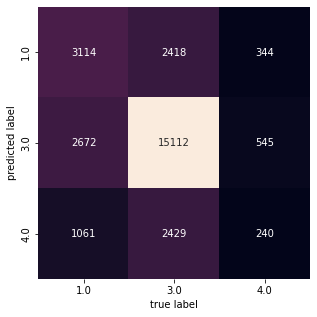

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# evaluating model performance
# plot the confusion matrix
mat = confusion_matrix(y_test, NN_pred)
plt.figure(figsize=(5,5))

# np.unique(y_train) gives labels in a 'sorted' fashion appropriate to the outputs
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
#plt.title('Fig 2');

## Architecture 2

In [7]:
new_train = train.sample(10000)

In [8]:
x_train, y_train, x_test, y_test = new_train.iloc[:, :-1], new_train.iloc[:, -1], test.iloc[:, :-1], test.iloc[:, -1] 

In [ ]:
model1 = Sequential()
model1.add(Dense(300, activation='relu', input_dim = 30))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(x_train, to_categorical(y_train.apply(lambda x: round(x/2))),epochs=20, batch_size=1)

Epoch 1/20
10000/10000 [==============================] - 22s 2ms/step - loss: 12.0324 - accuracy: 0.6143
Epoch 2/20
10000/10000 [==============================] - 22s 2ms/step - loss: 0.6644 - accuracy: 0.6694
Epoch 3/20
10000/10000 [==============================] - 22s 2ms/step - loss: 0.6770 - accuracy: 0.6689
Epoch 4/20
10000/10000 [==============================] - 22s 2ms/step - loss: 0.6739 - accuracy: 0.6694
Epoch 5/20
10000/10000 [==============================] - 22s 2ms/step - loss: 0.6347 - accuracy: 0.6696
Epoch 6/20
10000/10000 [==============================] - 22s 2ms/step - loss: 0.6347 - accuracy: 0.6696
Epoch 7/20
10000/10000 [==============================] - 22s 2ms/step - loss: 0.6714 - accuracy: 0.6692
Epoch 8/20
10000/10000 [==============================] - 24s 2ms/step - loss: 0.6382 - accuracy: 0.6696
Epoch 9/20
10000/10000 [==============================] - 22s 2ms/step - loss: 0.6346 - accuracy: 0.6696
Epoch 10/20
10000/10000 [=============================

In [ ]:
l2 = to_categorical(y_test.apply(lambda x: round(x/2))).argmax(axis=1)

In [ ]:
l1 = model1.predict(x_test).argmax(axis=1)
sum(l1==l2)/len(y_test)

873/873 [==============================] - 1s 1ms/step


0.7543941292285663

In [ ]:
f1_score(l1,y_test, average = 'macro')

In [ ]:
model1.save('model1')

## Architecture 3

In [9]:
new_train2 = train.sample(100000)

In [10]:
x_train2, y_train2 = new_train2.iloc[:, :-1], new_train2.iloc[:, -1]

In [ ]:
model2 = Sequential()
model2.add(Dense(300, activation='relu', input_dim = 30))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(x_train2, to_categorical(y_train2.apply(lambda x: round(x/2))),epochs=10, batch_size=1)

Epoch 1/10
100000/100000 [==============================] - 219s 2ms/step - loss: 1.8911 - accuracy: 0.6628
Epoch 2/10
100000/100000 [==============================] - 218s 2ms/step - loss: 0.6424 - accuracy: 0.6673
Epoch 3/10
100000/100000 [==============================] - 219s 2ms/step - loss: 0.6426 - accuracy: 0.6672
Epoch 4/10
100000/100000 [==============================] - 218s 2ms/step - loss: 0.6363 - accuracy: 0.6673
Epoch 5/10
100000/100000 [==============================] - 218s 2ms/step - loss: 0.6363 - accuracy: 0.6673
Epoch 6/10
100000/100000 [==============================] - 215s 2ms/step - loss: 0.6363 - accuracy: 0.6673
Epoch 7/10
100000/100000 [==============================] - 216s 2ms/step - loss: 0.6363 - accuracy: 0.6673
Epoch 8/10
100000/100000 [==============================] - 215s 2ms/step - loss: 0.6364 - accuracy: 0.6673
Epoch 9/10
100000/100000 [==============================] - 215s 2ms/step - loss: 0.6363 - accuracy: 0.6673
Epoch 10/10
100000/100000 [=

In [ ]:
l1 = model2.predict(x_test).argmax(axis=1)

873/873 [==============================] - 1s 1ms/step


In [ ]:
sum(l1==l2)/len(y_test)

0.754895292643637

In [ ]:
f1_score(l1,y_test, average = 'macro')

In [ ]:
model2.save('model2')

## Architecture 4

In [11]:
x_train3, y_train3 = train.iloc[:, :-1], train.iloc[:, -1]

In [ ]:
model3 = Sequential()
model3.add(Dense(500, activation='relu', input_dim = 30))
model3.add(Dense(3, activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model3.fit(x_train3, to_categorical(y_train3.apply(lambda x: round(x/2))), validation_data=(x_test, to_categorical(y_test.apply(lambda x: round(x/2)))),epochs=20, callbacks=[es], batch_size = 1)

Epoch 1/20
240123/240123 [==============================] - 566s 2ms/step - loss: 1.9314 - accuracy: 0.6610 - val_loss: 0.5910 - val_accuracy: 0.7548
Epoch 2/20
240123/240123 [==============================] - 558s 2ms/step - loss: 0.6489 - accuracy: 0.6666 - val_loss: 0.5749 - val_accuracy: 0.7549
Epoch 2: early stopping


In [ ]:
f1_score(l1,y_test, average = 'macro')

In [ ]:
model3.save('model3')